# Marketing Campaign

## Stage 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.proportion as sp
import scipy.stats as st

In [2]:
path = 'marketing_campaign.xlsx'

df = pd.read_excel(path)
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Descriptive Statistics

In [4]:
df.describe().transpose()

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0

In [5]:
nums= ['Year_Birth','Kidhome','Teenhome','Income','Recency','MntWines','MntFruits','MntMeatProducts',
       'MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases',
       'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumStorePurchases',
       'NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1',
       'Complain','Z_CostContact','Z_Revenue','Response',]
cats= ['Education','Marital_Status']

In [6]:
df[nums].describe()

Year_Birth      Kidhome     Teenhome         Income      Recency  \
count  2240.000000  2240.000000  2240.000000    2216.000000  2240.000000   
mean   1968.805804     0.444196     0.506250   52247.251354    49.109375   
std      11.984069     0.538398     0.544538   25173.076661    28.962453   
min    1893.000000     0.000000     0.000000    1730.000000     0.000000   
25%    1959.000000     0.000000     0.000000   35303.000000    24.000000   
50%    1970.000000     0.000000     0.000000   51381.500000    49.000000   
75%    1977.000000     1.000000     1.000000   68522.000000    74.000000   
max    1996.000000     2.000000     2.000000  666666.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  NumStorePurchases  NumWebVisitsMonth  \
count       2240.000000  ...        2240.000000        2240.000000   
mean          27.062946  ...           5.790179           5.316518   
std           41.280498  ...           3.250958           2.426645   
min            0.000000  ...           0.000000           0.000000   
25%            1.000000  ...           3.000000           3.000000   
50%            8.000000  ...           5.000000           6.000000   
75%           33.000000  ...           8.000000           7.000000   
max          263.000000  ...          13.000000          20.000000   

       AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1     Complain  \
count   2240.000000   2240.000000   2240.000000   2240.000000  2240.000000   
mean       0.072768      0.074554      0.072768      0.064286     0.009375   
std        0.259813      0.262728      0.259813      0.245316     0.096391   
min        0.000000      0.000000      0.000000      0.000000     0.000000   
25%        0.000000      0.000000      0.000000      0.000000     0.000000   
50%        0.000000      0.000000      0.000000      0.000000     0.000000   
75%        0.000000      0.000000      0.000000      0.000000     0.000000   
max        1.000000      1.000000      1.000000      1.000000     1.000000   

       Z_CostContact  Z_Revenue     Response  
count         2240.0     2240.0  2240.000000  
mean             3.0       11.0     0.149107  
std              0.0        0.0     0.356274  
min              3.0       11.0     0.000000  
25%              3.0       11.0     0.000000  
50%              3.0       11.0     0.000000  
75%              3.0       11.0     0.000000  
max              3.0       11.0     1.000000  

[8 rows x 25 columns]

In [7]:
df[cats].describe()

Education Marital_Status
count         2240           2240
unique           5              8
top     Graduation        Married
freq          1127            864

In [8]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Education:
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Value count kolom Marital_Status:
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64



A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?

Semua kolom sudah memiliki tipe data yang sesuai.


B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

Ada, yaitu, kolom Income (2216 of 2240).


C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)

- Kolom Year Birth ada kemungkinan outlier/nilai minimum agak aneh (1893).
- Nilai maksimum kolom Income terlalu jauh (kemungkinan outlier). Perbandingan nilai mean & median pun berbeda jauh.
- Besaran nilai mean & median pada kolom jumlah pembelian per produk (Mnt...) jauh berbeda. Terdapat kemungkinan skew.
- Terdapat kemungkinan outlier pada nilai maksimum di kolom jumlah pembelian per media belanja (Num...).

### Univariate Analysis

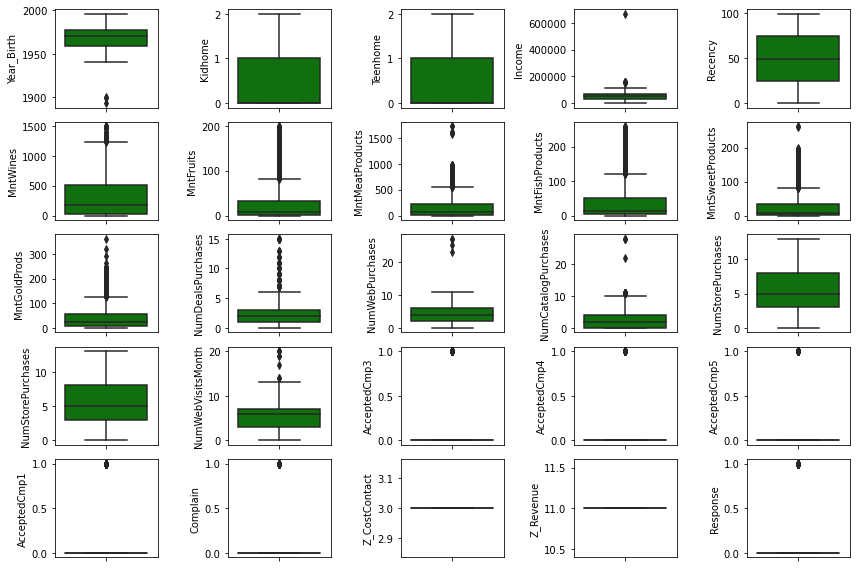

In [9]:
features = nums
plt.figure(figsize=(12, 8))
for i in range(0, len(features)):
    plt.subplot(5, 5, i+1)
    sns.boxplot(y=df[features[i]], color='green', orient='v')
    plt.tight_layout()

- Banyak data outlier di kolom pembelian produk `Mnt` dan juga kolom `Num`

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


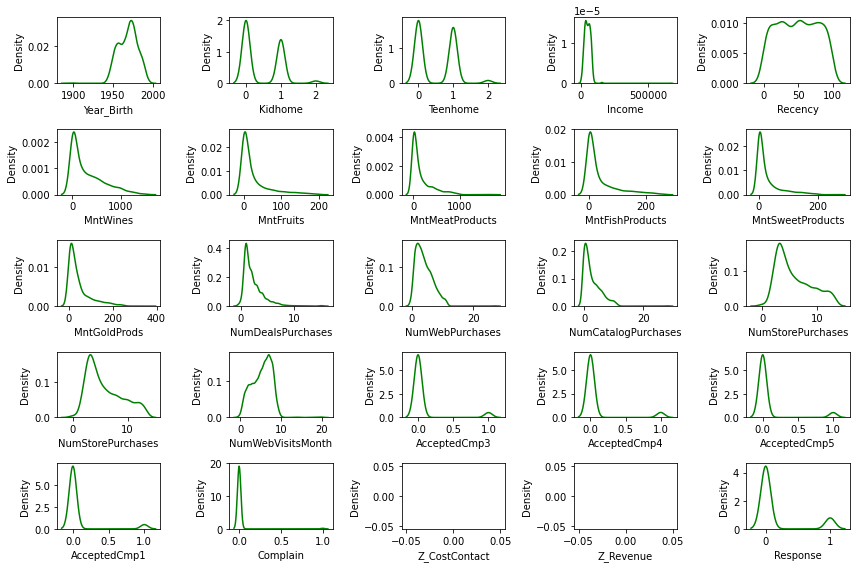

In [10]:
features = nums
plt.figure(figsize=(12, 8))
for i in range(0, len(features)):
    plt.subplot(5, 5, i+1)
    sns.kdeplot(x=df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

- Untuk kolom pembelian produk cenderung skewed, harus dilakukuan tindakan agar penyebarannya normal

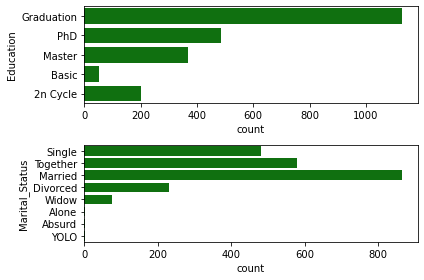

In [11]:
for i in range(0, len(cats)):
    plt.subplot(2, 1, i+1)
    sns.countplot(y = df[cats[i]], color='green', orient='v')
    plt.tight_layout()

- Untuk pembeli terbanyak datang dari customer yang memiliki tingkat pendidikan `Graduation` dan status `Married`

### Multivariate Analysis

<AxesSubplot:>

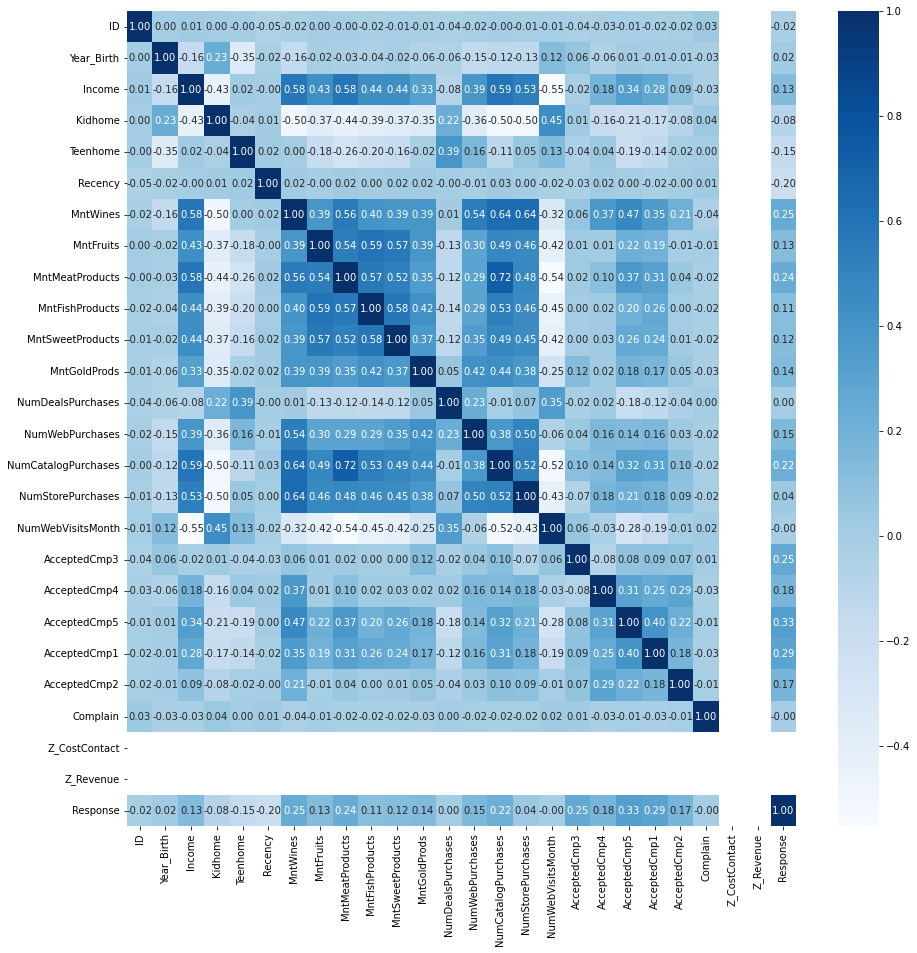

In [12]:
# correlation heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Dari *correlation heatmap* di atas dapat dilihat bahwa:
* Target `Response` memiliki korelasi paling kuat dengan `acceptedcmp5` (strong potential feature),`acceptedcmp1-4`,`Recency`,`Income`,`Teenhome`,`Kidhome`,`NumWeb & Numcatalog` dan semua produk `Mnt...` (decent potential feature).
* Di antara semua campaign, Campaign 5 memiliki korelasi terkuat terhadap Respon.
* Di antara produk yang terjual, produk Wines dan Daging memiliki korelasi yang lebih kuat dibanding produk lainnya terhadap Respon. 
* Sedangkan korelasi `Response` dengan `umur` dan `numstore` sangat lemah ~0, ini menandakan bisa jadi mereka bukan fitur yang potensial
* `MntMeat` (Pembelian Daging) memiliki korelasi positif cukup kuat (r=0.72) dengan `NumCatalog` (Pembelian lewat Catalog). Korelasi cukup tinggi sehingga rawan menjadi Redundant. (Perlu diperhatikan saat training model).

In [13]:
df_sample = df.sample(1000, random_state=42)

<Figure size 1080x1080 with 0 Axes>

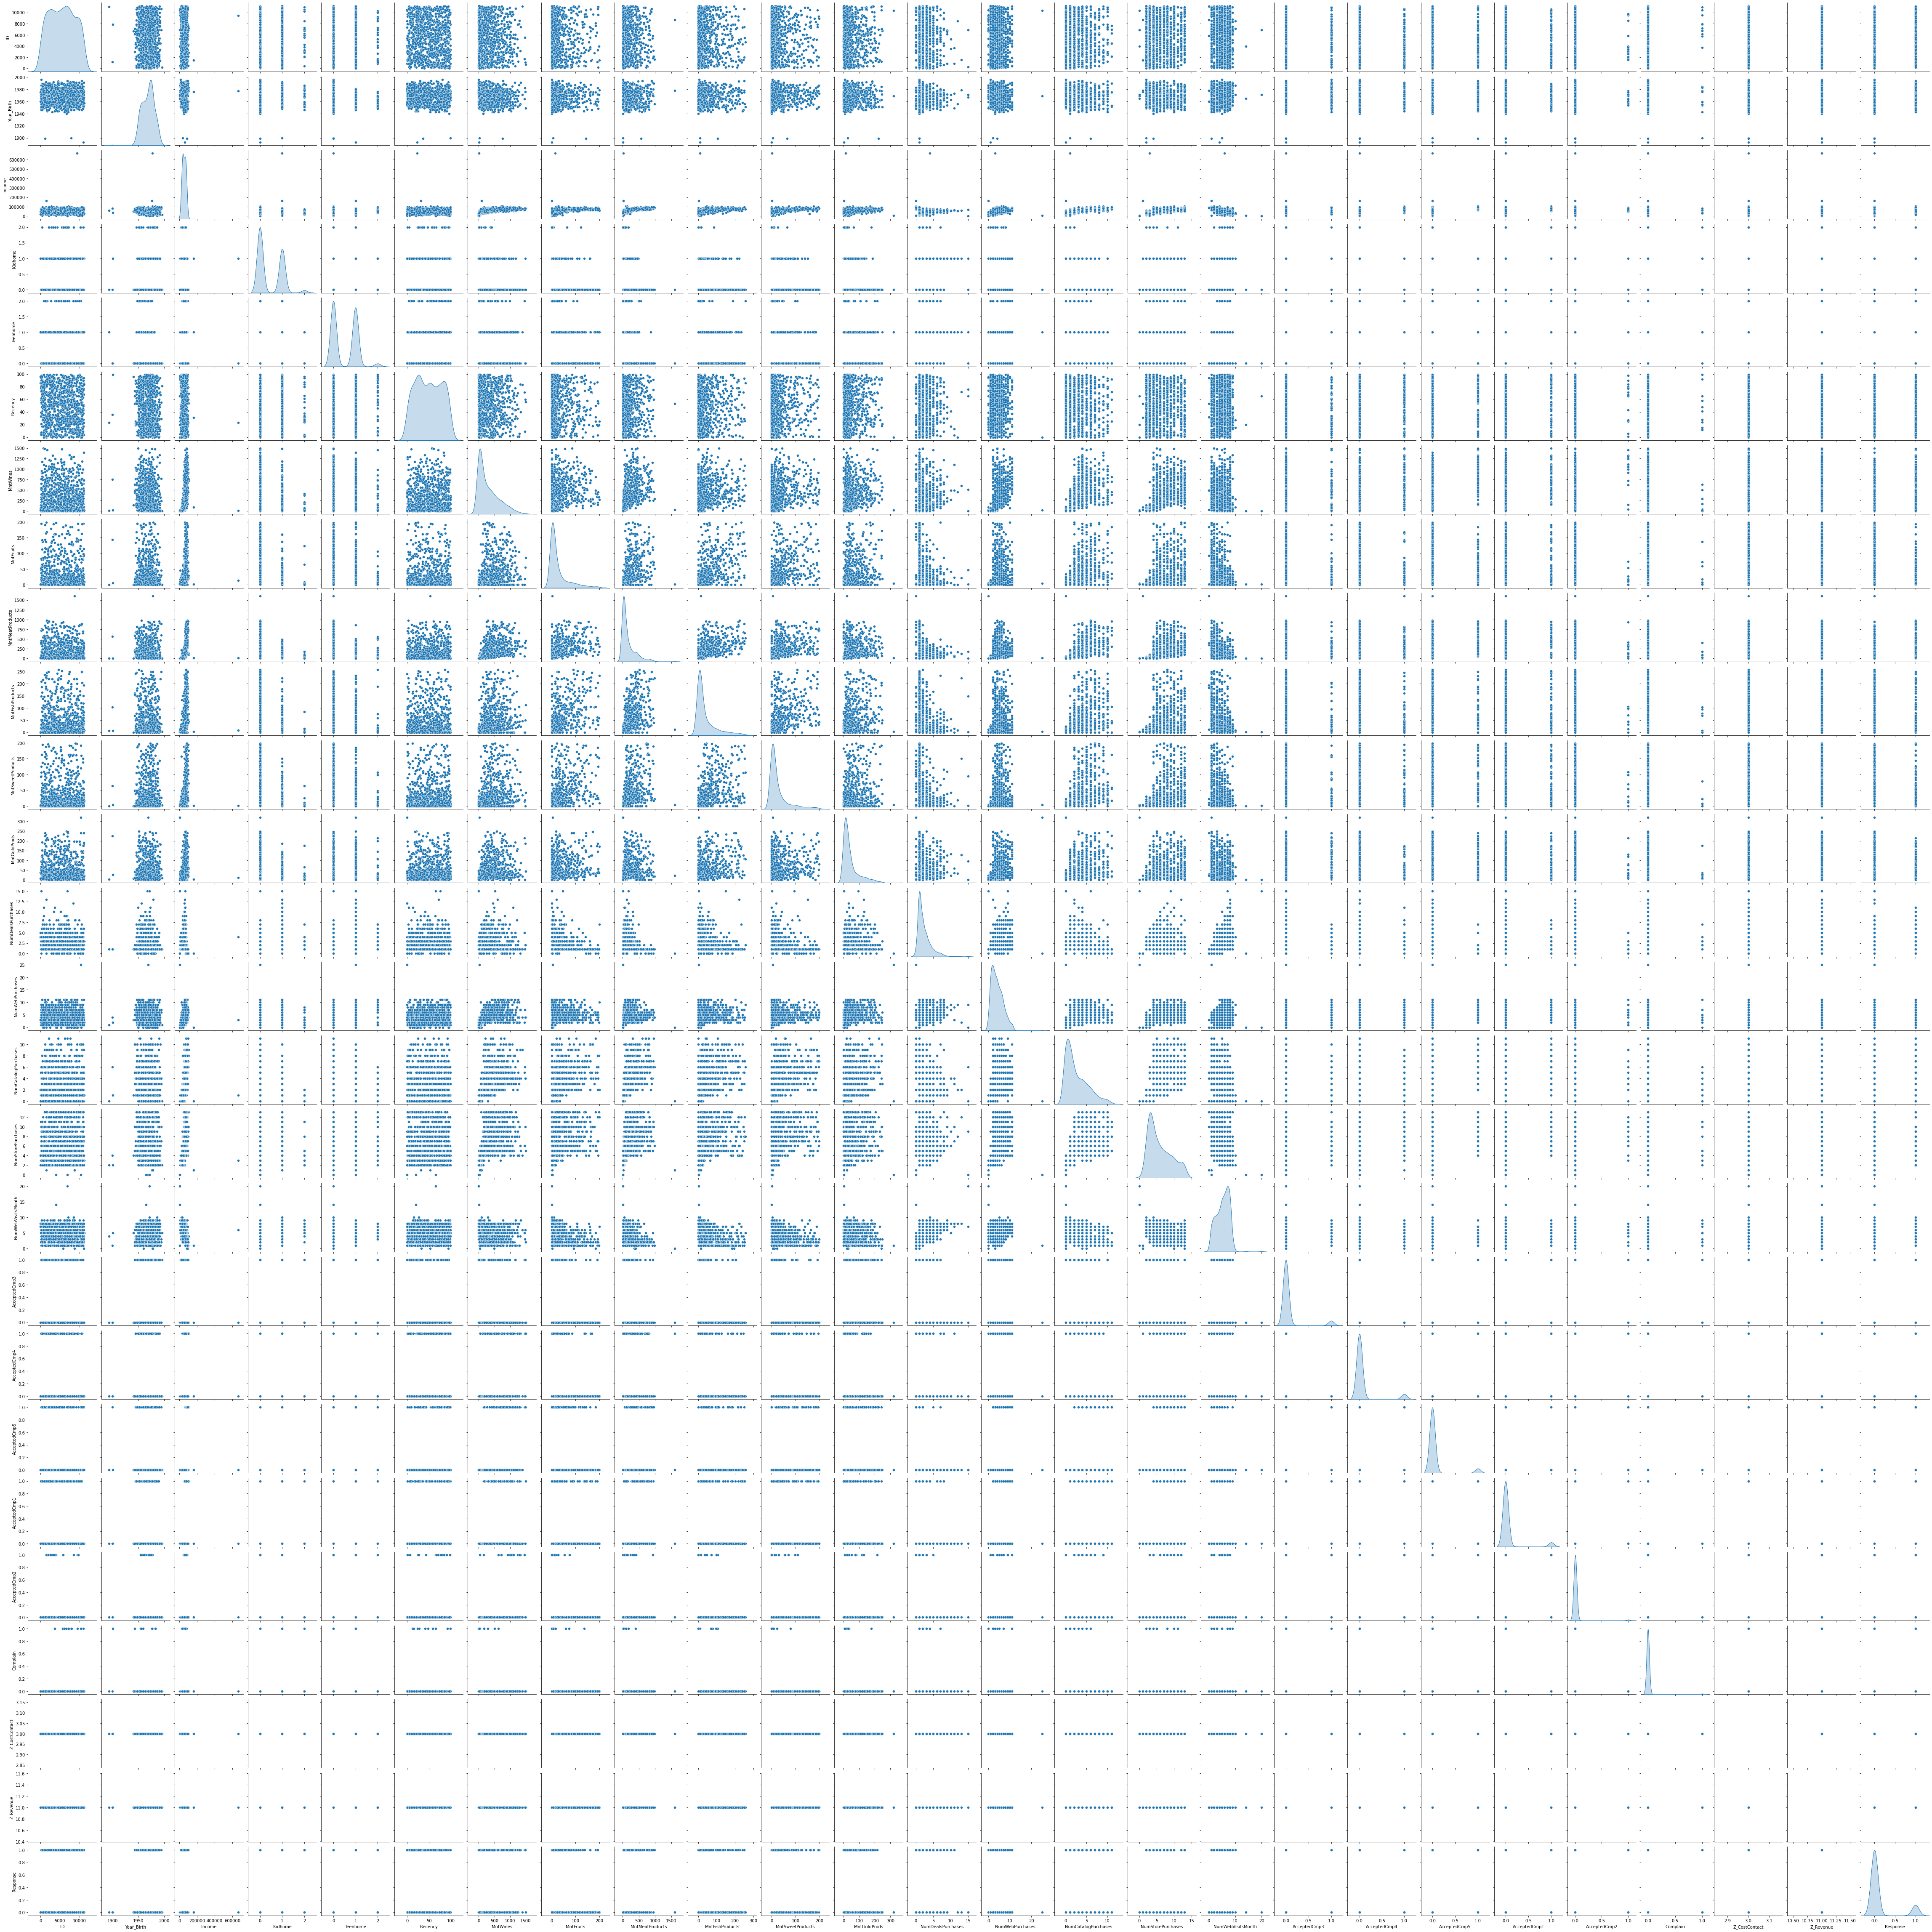

In [14]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_sample, diag_kind='kde')

Dapat terlihat bahwa:
* Target Response memiliki korelasi dengan Campaign (1 sampai 5), Recency, KidsHome, TeenHome, income, NumWeb & NumCatalog dan semua produk (Mnt..).
* Namun, berbeda dengan hasil `Correlation Heatmap` yang menunjukkan relasi kuat antara jumlah pembelian `Daging` dan `NumCatalog`, pada `Pair Plot` di atas, tidak terlihat hubungan yang linear antara keduanya. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


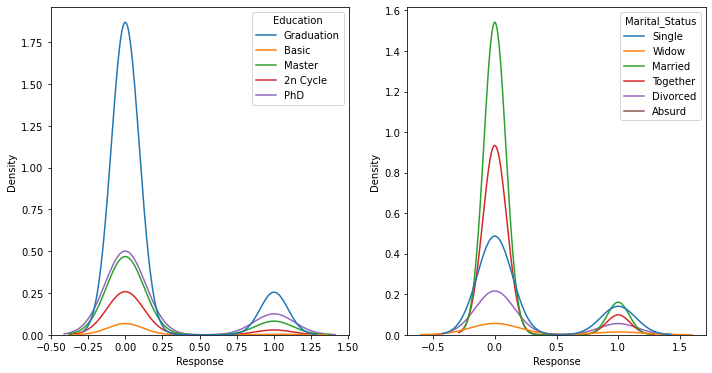

In [15]:
features = cats
plt.figure(figsize=(10, 10))
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1) 
    sns.kdeplot(data=df_sample, x='Response', hue=features[i])
    #plt.xlabel(features[i])
    plt.tight_layout();

* Sepertinya, semua jenis Pendidikan memiliki efek yang kurang lebih sama terhadap Respon.
* Begitu juga dengan Status Pernikahan.

### EDA Conclusion

1. Data telihat valid, tidak ada kecacatan yang signifikan
2. Data kosong berada di kolom `Income` sehingga nanti akan ditangani ketika proses preprocessing
3. Beberapa data memiliki bentuk distribusi positive skewed, sehingga nanti perlu diberikan perlakuan agar data menjadi normal
4. Jika dilihat dari media pembelian ('NumCatalogPurchases','NumStorePurchases','NumWebPurchases'). `NumCatalogPurchases` memiliki hubungan yang relatif lebih kuat apabila dihubungkan dengan 'AcceptedCmp' dan 'Responses'.
5. Dari feature categorical : `MaritalStatus` dan `Education` berpotensi menjadi predictor model.
6. Di antara semua campaign, `Campaign 5` memiliki korelasi terkuat terhadap Respon.
7. Di antara produk yang terjual, produk `Wines` dan `Daging` memiliki korelasi yang lebih kuat dibanding produk lainnya terhadap Respon. 
8. Kemungkinan menambahkan kolom baru untuk membantu proses modelling

<AxesSubplot:xlabel='Total', ylabel='Product'>

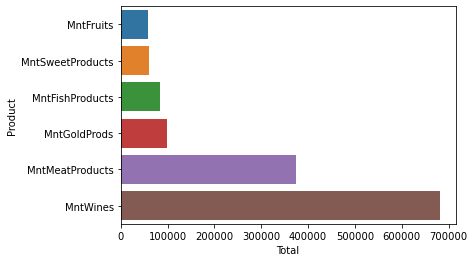

In [16]:
prods = [col for col in df if col.startswith('Mnt')]
df_P = df[prods].sum()
df_P1  = pd.DataFrame(df_P).reset_index()
df_P1.columns = ['Product','Total']
df_P1 = df_P1.sort_values('Total')

sns.barplot(y=df_P1['Product'], x=df_P1['Total'])

<AxesSubplot:xlabel='Total', ylabel='Num'>

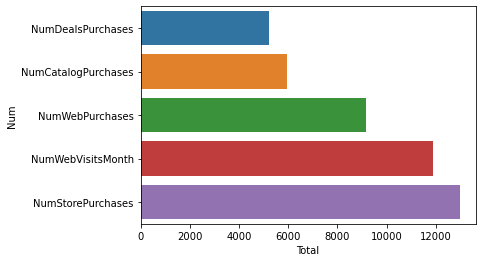

In [17]:
total_purchase = [col for col in df if col.startswith('Num')]
df_TP = df[total_purchase].sum()
df_TP1  = pd.DataFrame(df_TP).reset_index()
df_TP1.columns = ['Num','Total']
df_TP1 = df_TP1.sort_values('Total')

sns.barplot(y=df_TP1['Num'], x=df_TP1['Total'])

In [18]:
dfs1 = df.groupby(['Marital_Status', 'Response'])['ID'].count().reset_index(name='UniqueCustomer')
dfs2 = df.groupby(['Marital_Status'])['ID'].count().reset_index(name='AllUniqueCustomer')
dfs = dfs1.merge(dfs2, how = 'inner', on='Marital_Status')
dfs['PercentUniqueCustomer'] = round(dfs['UniqueCustomer']*100.0/dfs['AllUniqueCustomer'], 2) 
dfs= dfs.sort_values('AllUniqueCustomer', ascending= False)

Text(0.5, 1.0, 'Marital Status to Response percentage')

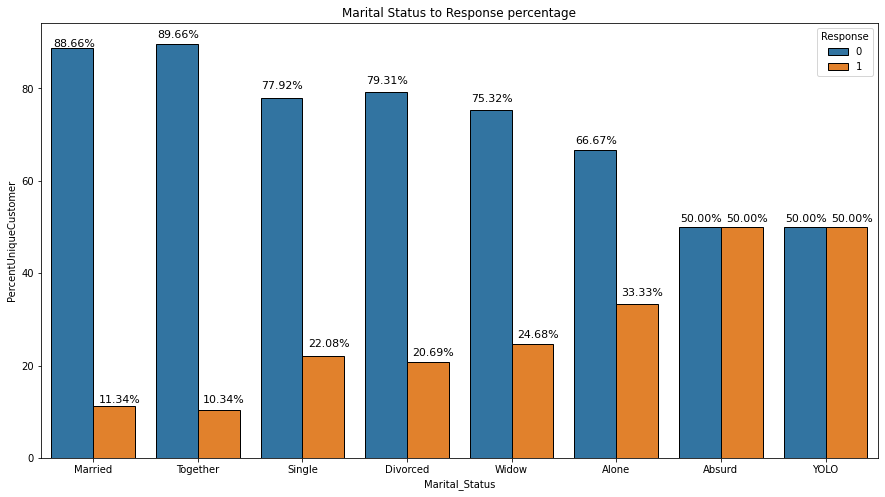

In [ ]:
f, ax = plt.subplots(figsize=(15, 8))

sns.barplot(x = 'Marital_Status', y = 'PercentUniqueCustomer', data = dfs,
            hue = 'Response',edgecolor = 'black')

plt.text(x = -0.18, y = 89, s = "88.66%", ha='center', fontsize=11)
plt.text(x = 0.25, y = 12, s = "11.34%", ha='center', fontsize=11)

plt.text(x = 0.81, y = 91, s = "89.66%", ha='center', fontsize=11)
plt.text(x = 1.25, y = 12, s = "10.34%", ha='center', fontsize=11)

plt.text(x = 1.81, y = 80, s = "77.92%", ha='center', fontsize=11)
plt.text(x = 2.25, y = 24, s = "22.08%", ha='center', fontsize=11)

plt.text(x = 2.81, y = 81, s = "79.31%", ha='center', fontsize=11)
plt.text(x = 3.25, y = 22, s = "20.69%", ha='center', fontsize=11)

plt.text(x = 3.81, y = 77, s = "75.32%", ha='center', fontsize=11)
plt.text(x = 4.25, y = 26, s = "24.68%", ha='center', fontsize=11)

plt.text(x = 4.81, y = 68, s = "66.67%", ha='center', fontsize=11)
plt.text(x = 5.25, y = 35, s = "33.33%", ha='center', fontsize=11)

plt.text(x = 5.81, y = 51, s = "50.00%", ha='center', fontsize=11)
plt.text(x = 6.25, y = 51, s = "50.00%", ha='center', fontsize=11)

plt.text(x = 6.81, y = 51, s = "50.00%", ha='center', fontsize=11)
plt.text(x = 7.25, y = 51, s = "50.00%", ha='center', fontsize=11)

plt.title('Marital Status to Response percentage')

In [ ]:
des1 = df.groupby(['Education', 'Response'])['ID'].count().reset_index(name='UniqueCustomer')
des2 = df.groupby(['Education'])['ID'].count().reset_index(name='AllUniqueCustomer')
des = des1.merge(des2, how = 'inner', on='Education')
des['PercentUniqueCustomer'] = round(des['UniqueCustomer']*100.0/des['AllUniqueCustomer'], 2) 
des= des.sort_values('AllUniqueCustomer', ascending= False)

Text(0.5, 1.0, 'Education to Response percentage')

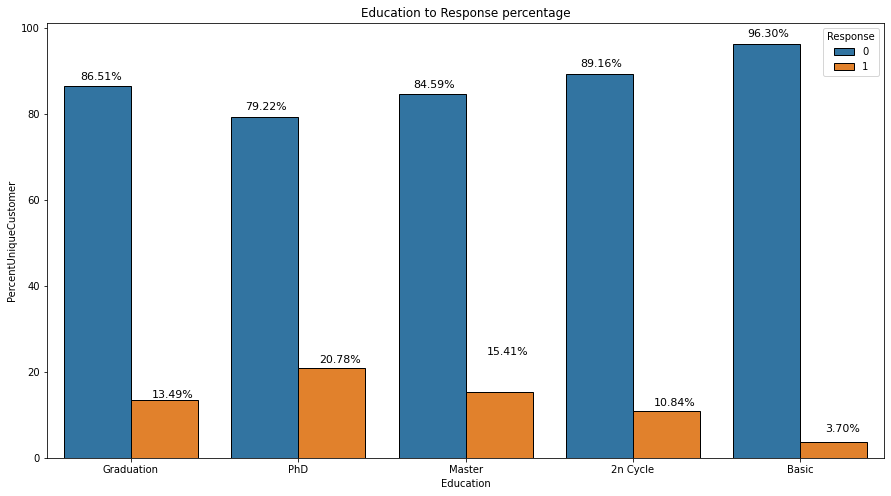

In [ ]:
f, ax = plt.subplots(figsize=(15, 8))

sns.barplot(x = 'Education', y = 'PercentUniqueCustomer', data = des,
            hue = 'Response',edgecolor = 'black')

plt.text(x = -0.18, y = 88, s = "86.51%", ha='center', fontsize=11)
plt.text(x = 0.25, y = 14, s = "13.49%", ha='center', fontsize=11)

plt.text(x = 0.81, y = 81, s = "79.22%", ha='center', fontsize=11)
plt.text(x = 1.25, y = 22, s = "20.78%", ha='center', fontsize=11)

plt.text(x = 1.81, y = 86, s = "84.59%", ha='center', fontsize=11)
plt.text(x = 2.25, y = 24, s = "15.41%", ha='center', fontsize=11)

plt.text(x = 2.81, y = 91, s = "89.16%", ha='center', fontsize=11)
plt.text(x = 3.25, y = 12, s = "10.84%", ha='center', fontsize=11)

plt.text(x = 3.81, y = 98, s = "96.30%", ha='center', fontsize=11)
plt.text(x = 4.25, y = 6, s = "3.70%", ha='center', fontsize=11)

plt.title('Education to Response percentage')

In [ ]:
Q1 = df.Income.quantile(.25)
Q3 = df.Income.quantile(.75)

NameError: ignored

In [ ]:
def segment(x):
    try:
        x.Income.isnumeric()
    except:
        segment = 'No Sales'
    if x.Income >= Q3:
        segment = 'High'
    elif x.Income < Q3 and x.Income >= Q1:
        segment = 'Medium'
    else:
        segment = 'Low'
    return segment

In [ ]:
df['Segmentasi'] = df.apply(lambda x: segment(x), axis = 1)
df.tail()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  \
2235         1  2013-06-13       46       709  ...             0   
2236         1  2014-06-10       56       406  ...             0   
2237         0  2014-01-25       91       908  ...             0   
2238         1  2014-01-24        8       428  ...             0   
2239         1  2012-10-15       40        84  ...             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
2235             0             0             0             0         0   
2236             0             0             1             0         0   
2237             1             0             0             0         0   
2238             0             0             0             0         0   
2239             0             0             0             0         0   

      Z_CostContact  Z_Revenue  Response  Segmentasi  
2235              3         11         0      Medium  
2236              3         11         0      Medium  
2237              3         11         0      Medium  
2238              3         11         0        High  
2239              3         11         1      Medium  

[5 rows x 30 columns]

In [ ]:
seg1 = df.groupby(['Segmentasi', 'Response'])['ID'].count().reset_index(name='UniqueCustomer')
seg2 = df.groupby(['Segmentasi'])['ID'].count().reset_index(name='AllUniqueCustomer')
seg = seg1.merge(seg2, how = 'inner', on='Segmentasi')
seg['PercentUniqueCustomer'] = round(seg['UniqueCustomer']*100.0/seg['AllUniqueCustomer'], 2)

Text(0.5, 1.0, 'Segmentation to Response percentage')

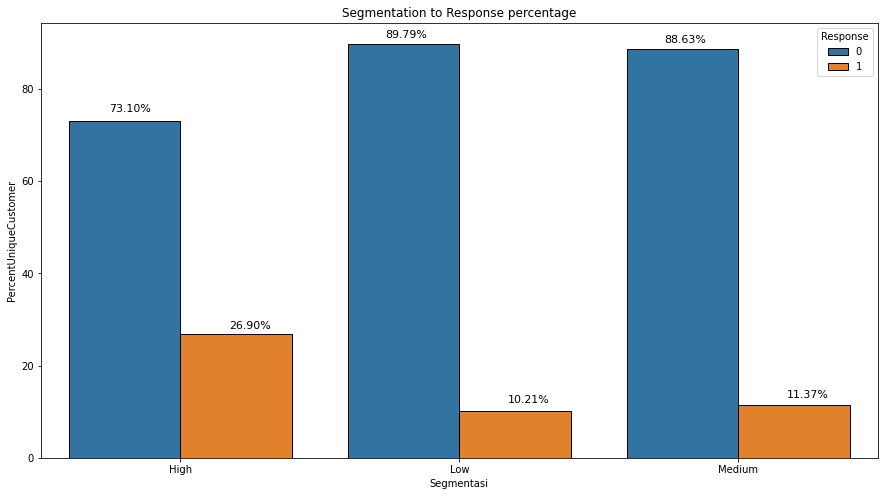

In [ ]:
f, ax = plt.subplots(figsize=(15, 8))

sns.barplot(x = 'Segmentasi', y = 'PercentUniqueCustomer', data = seg,
            hue = 'Response',edgecolor = 'black')

plt.text(x = -0.18, y = 75, s = "73.10%", ha='center', fontsize=11)
plt.text(x = 0.25, y = 28, s = "26.90%", ha='center', fontsize=11)

plt.text(x = 0.81, y = 91, s = "89.79%", ha='center', fontsize=11)
plt.text(x = 1.25, y = 12, s = "10.21%", ha='center', fontsize=11)

plt.text(x = 1.81, y = 90, s = "88.63%", ha='center', fontsize=11)
plt.text(x = 2.25, y = 13, s = "11.37%", ha='center', fontsize=11)

plt.title('Segmentation to Response percentage')